In [25]:
import pandas as pd
import matplotlib.pyplot as plt

- You had the day imported 2x here 
- fixed your except block. Having rigid printed errors can be good but you likely missed edge cases. So this will dynimacally cover you. 

In [26]:
# df = pd.read_csv("data/Louisville_Metro_KY_Meals_Served_Summary.csv")
try:
    df = pd.read_csv('data/Louisville_Metro_KY_Meals_Served_Summary.csv')
    print("File loaded successfully.")
except Exception as e:
        print(f"The error is: ",{e})

File loaded successfully.


Broke up to make it more readable 

In [27]:
df.head()

,MealID,Date,BREADFST_SERV,LUNCH_SERV,SNACK_SERV,Site,SiteAddress,SiteZipcode,ObjectId
0,301,6/11/2009 4:00:00 AM,0.0,21,25,VICTORY CHRISTIAN CDC,1410 DIXIE HIGHWAY,40210,1
1,302,6/11/2009 4:00:00 AM,0.0,22,0,WALNUT ST ACTIVITIES,1143 S. 3RD ST.,40203,2
2,303,6/11/2009 4:00:00 AM,0.0,22,20,REFUGE IN KENTUCKY,207 S. Hancock,40202,3
3,304,6/11/2009 4:00:00 AM,0.0,23,26,REDEEMED CHRISTIAN CHURCH,3725 RIVER PARK DRIVE,40211,4
4,305,6/11/2009 4:00:00 AM,0.0,27,0,NEW JERUSALEM SPCL MNSTRY,2973 WILSON AVENUE,40211,5


Same here noting major just making everything read easier. 

In [28]:
space = "--------------------------------------------------------------------------------\n"
print(df.info(),"\n",space)
print(df.columns,"\n", space)
print(df.describe(),"\n",space)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MealID         9992 non-null   int64  
 1   Date           9992 non-null   object 
 2   BREADFST_SERV  9990 non-null   float64
 3   LUNCH_SERV     9992 non-null   int64  
 4   SNACK_SERV     9992 non-null   int64  
 5   Site           9992 non-null   object 
 6   SiteAddress    9992 non-null   object 
 7   SiteZipcode    9992 non-null   object 
 8   ObjectId       9992 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 702.7+ KB
None 
 --------------------------------------------------------------------------------

Index(['MealID', 'Date', 'BREADFST_SERV', 'LUNCH_SERV', 'SNACK_SERV', 'Site',
       'SiteAddress', 'SiteZipcode', 'ObjectId'],
      dtype='object') 
 --------------------------------------------------------------------------------

            MealID  BRE

When removing data we want to make a note of why we removed it and why. Same for filling in something. This way if someone comes back after the fact they know the thought process. It may be an error you made or it may be something critical no one else caught and you saved the intregerdy of the project. 

In [29]:
df_drop = df[~df.apply(lambda row: row.astype(str).str.contains('STE 231').any(), axis=1)]
df_filled = df_drop.fillna(0)
df_drop = df_filled.copy()
df_drop['BREADFST_SERV'] = df_drop['BREADFST_SERV'].astype(int)
df_drop.head(2)

,MealID,Date,BREADFST_SERV,LUNCH_SERV,SNACK_SERV,Site,SiteAddress,SiteZipcode,ObjectId
0,301,6/11/2009 4:00:00 AM,0,21,25,VICTORY CHRISTIAN CDC,1410 DIXIE HIGHWAY,40210,1
1,302,6/11/2009 4:00:00 AM,0,22,0,WALNUT ST ACTIVITIES,1143 S. 3RD ST.,40203,2


Added reset index to make more readable. 

In [30]:
meal_totals = df_drop.groupby('SiteZipcode')[['BREADFST_SERV', 'LUNCH_SERV', 'SNACK_SERV']].sum().reset_index()
meal_totals

,SiteZipcode,BREADFST_SERV,LUNCH_SERV,SNACK_SERV
0,40202,1294,3439,400
1,40203,35726,86061,3076
2,40204,11385,18452,0
3,40205,1296,6648,0
4,40206,17,3753,3696
5,40208,5998,7719,0
6,40210,14914,45617,6992
7,40211,31187,70320,10141
8,40212,9262,53730,18513
9,40213,5795,6833,2068


             BREADFST_SERV  LUNCH_SERV  SNACK_SERV
SiteZipcode                                       
40202                 1294        3439         400
40203                35726       86061        3076
40204                11385       18452           0
40205                 1296        6648           0
40206                   17        3753        3696
40208                 5998        7719           0
40210                14914       45617        6992
40211                31187       70320       10141
40212                 9262       53730       18513
40213                 5795        6833        2068
40214                12023       12586        3376
40215                 4141       15948        5910
40216                 9023       12563        2769
40218                 4661       33390       32411
40219                  615        1471         429
40220                 5904         709        6788
40223                    0        1977        2120
40228                 3394     

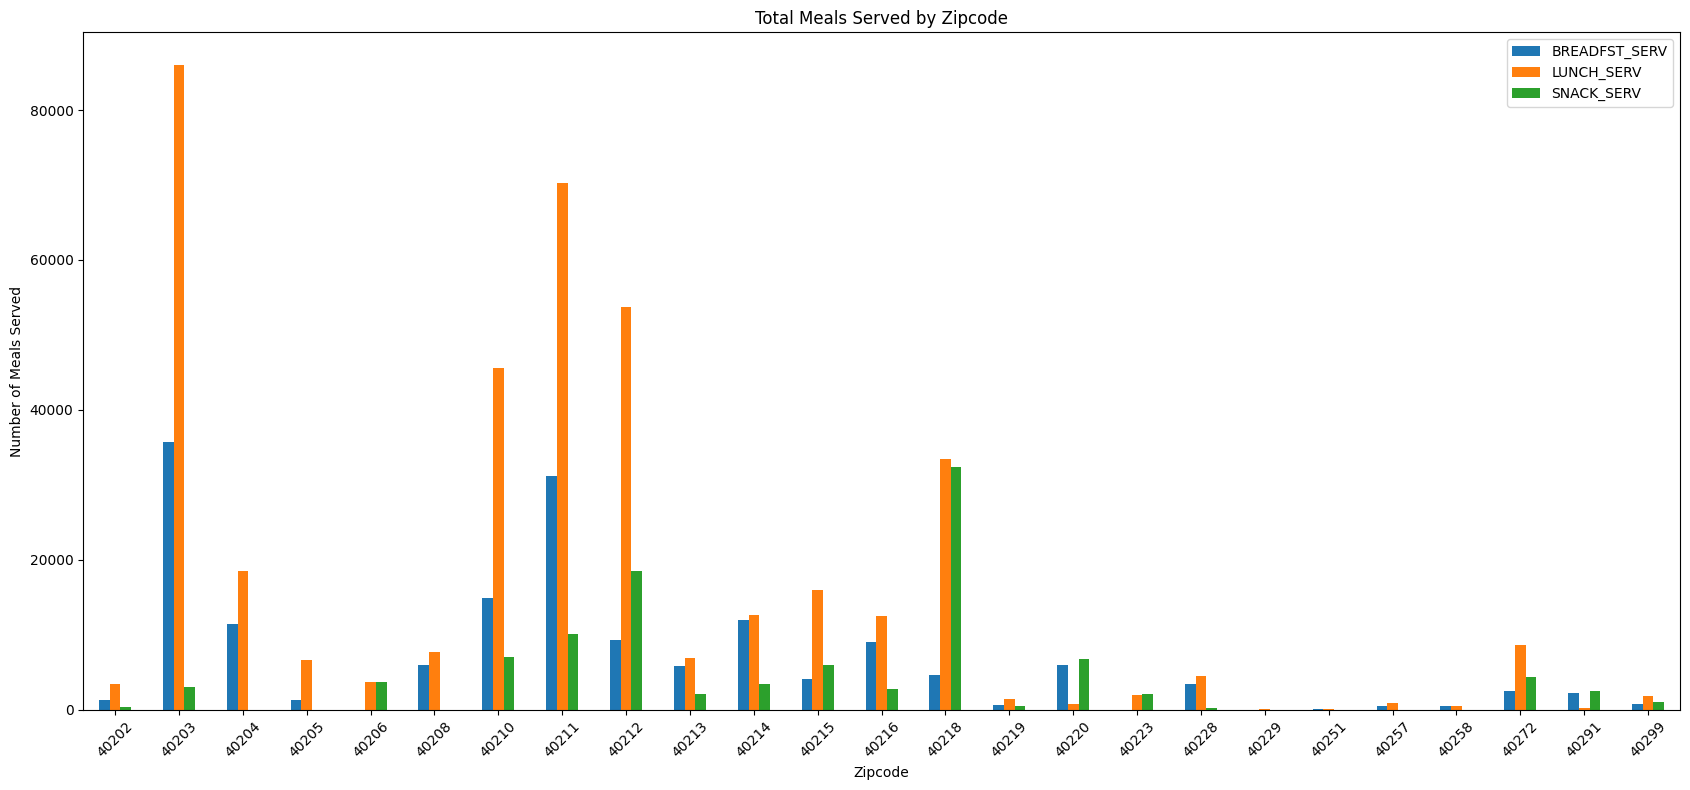

In [ ]:
meal_totals = df_drop.groupby('SiteZipcode')[['BREADFST_SERV', 'LUNCH_SERV', 'SNACK_SERV']].sum()
print(meal_totals)

meal_totals.plot(kind='bar', figsize=(17,8))
plt.title('Total Meals Served by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Number of Meals Served')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

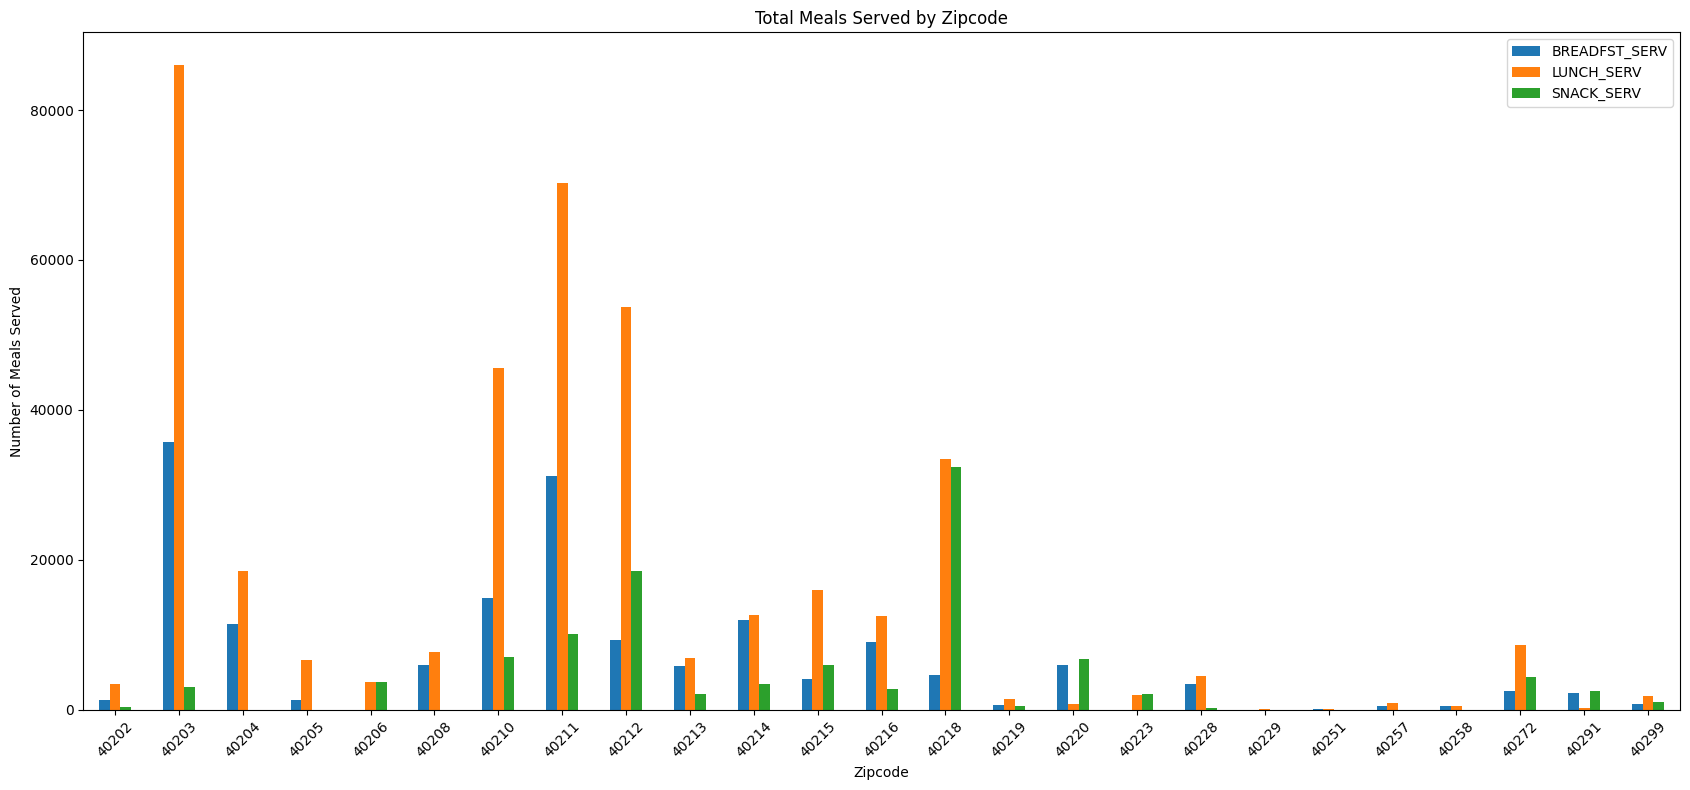

In [75]:
meal_totals.plot(kind='bar', figsize=(17,8))
plt.title('Total Meals Served by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Number of Meals Served')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

Be sure to make comments on your code. Will you 6 months from now know what this is doing? 

In [32]:
Q1 = meal_totals['LUNCH_SERV'].quantile(0.25)
Q3 = meal_totals['LUNCH_SERV'].quantile(0.75)
IQR = Q3 - Q1
outliers = meal_totals[(meal_totals['LUNCH_SERV'] < (Q1 - 1.5 * IQR)) | (meal_totals['LUNCH_SERV'] > (Q3 + 1.5 * IQR))]
print(outliers)

  SiteZipcode  BREADFST_SERV  LUNCH_SERV  SNACK_SERV
1       40203          35726       86061        3076
6       40210          14914       45617        6992
7       40211          31187       70320       10141
8       40212           9262       53730       18513


split up the table and plot unless you want them together. In plat case plot the table too :) 

      BREADFST_SERV  LUNCH_SERV  SNACK_SERV
Year                                       
2009          35975       71567       21522
2010          48236      130015       35146
2011          39267       90054       23174
2012          18976       49689       14247
2013          20757       56627       12586


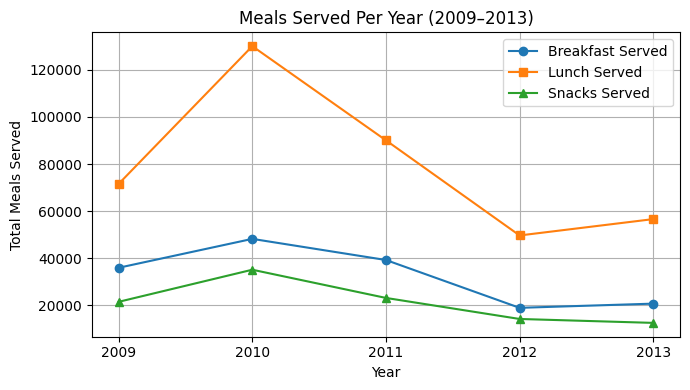

In [33]:
df_drop['Year'] = pd.to_datetime(df_drop['Date']).dt.year
df_year = df_drop[df_drop['Year'].between(2009, 2014)]
yearly_totals = df_year.groupby('Year')[['BREADFST_SERV', 'LUNCH_SERV', 'SNACK_SERV']].sum()
print(yearly_totals)

plt.figure(figsize=(7, 4))
plt.plot(yearly_totals.index, yearly_totals['BREADFST_SERV'], marker='o', label='Breakfast Served')
plt.plot(yearly_totals.index, yearly_totals['LUNCH_SERV'], marker='s', label='Lunch Served')
plt.plot(yearly_totals.index, yearly_totals['SNACK_SERV'], marker='^', label='Snacks Served')
plt.xticks(yearly_totals.index.astype(int))
plt.title('Meals Served Per Year (2009–2013)')
plt.xlabel('Year')
plt.ylabel('Total Meals Served')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
meals_by_zip_year = df_year.groupby(['SiteZipcode', 'Year'])[['BREADFST_SERV', 'LUNCH_SERV', 'SNACK_SERV']].sum().reset_index()
print(meals_by_zip_year)

meals_by_zip_year['label'] = meals_by_zip_year['SiteZipcode'].astype(str) + " - " + meals_by_zip_year['Year'].astype(str)



   SiteZipcode  Year  BREADFST_SERV  LUNCH_SERV  SNACK_SERV
0        40202  2009            212        1370         400
1        40202  2010            791        1520           0
2        40202  2011            291         549           0
3        40203  2009           5643       12049         412
4        40203  2010           8118       23906        1937
..         ...   ...            ...         ...         ...
84       40272  2013              0        1814        1872
85       40291  2009           2256         263        2463
86       40299  2009            740        1725         874
87       40299  2010              0          12           0
88       40299  2011              0         116         116

[89 rows x 5 columns]


This plot is good if you make some changes. We need to remove the legend. We can not process that much data. What are you looking to tell me with this plot? What is the important line? Is lower or higher better? Isolate the important zip and make that a color then make the others grey and change the Alpha of them so the don't stand out as much. So maybe the high orange is important one and we want to highligh? You could add a average line as well. Everything over the average could be colored too? 


Same applies to the bottom 3 plots. 

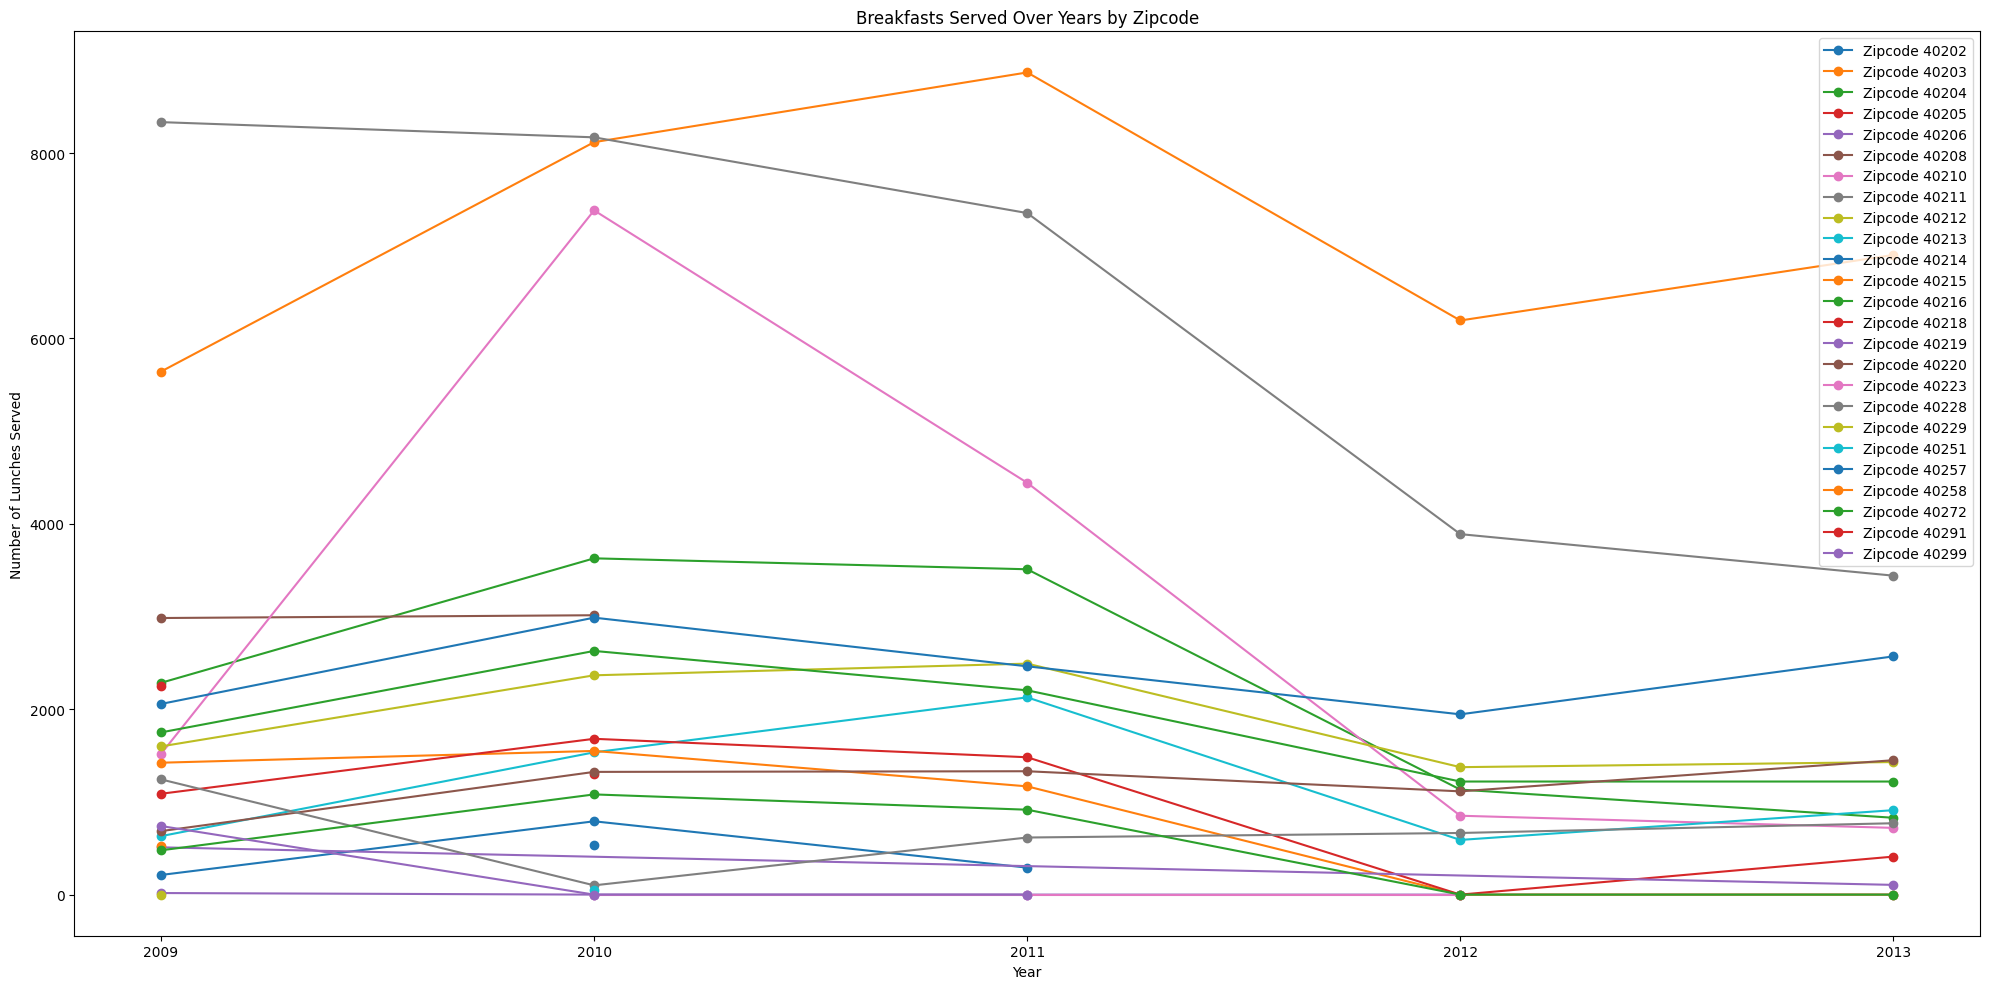

In [76]:
plt.figure(figsize=(20, 10))
for zipcode in meals_by_zip_year['SiteZipcode'].unique():
    subset = meals_by_zip_year[meals_by_zip_year['SiteZipcode'] == zipcode]
    plt.plot(subset['Year'], subset['BREADFST_SERV'], marker='o', label=f'Zipcode {zipcode}')

plt.title('Breakfasts Served Over Years by Zipcode')
plt.xticks(meals_by_zip_year['Year'].unique())
plt.xlabel('Year')
plt.ylabel('Number of Lunches Served')
plt.legend()
plt.tight_layout()
plt.show()

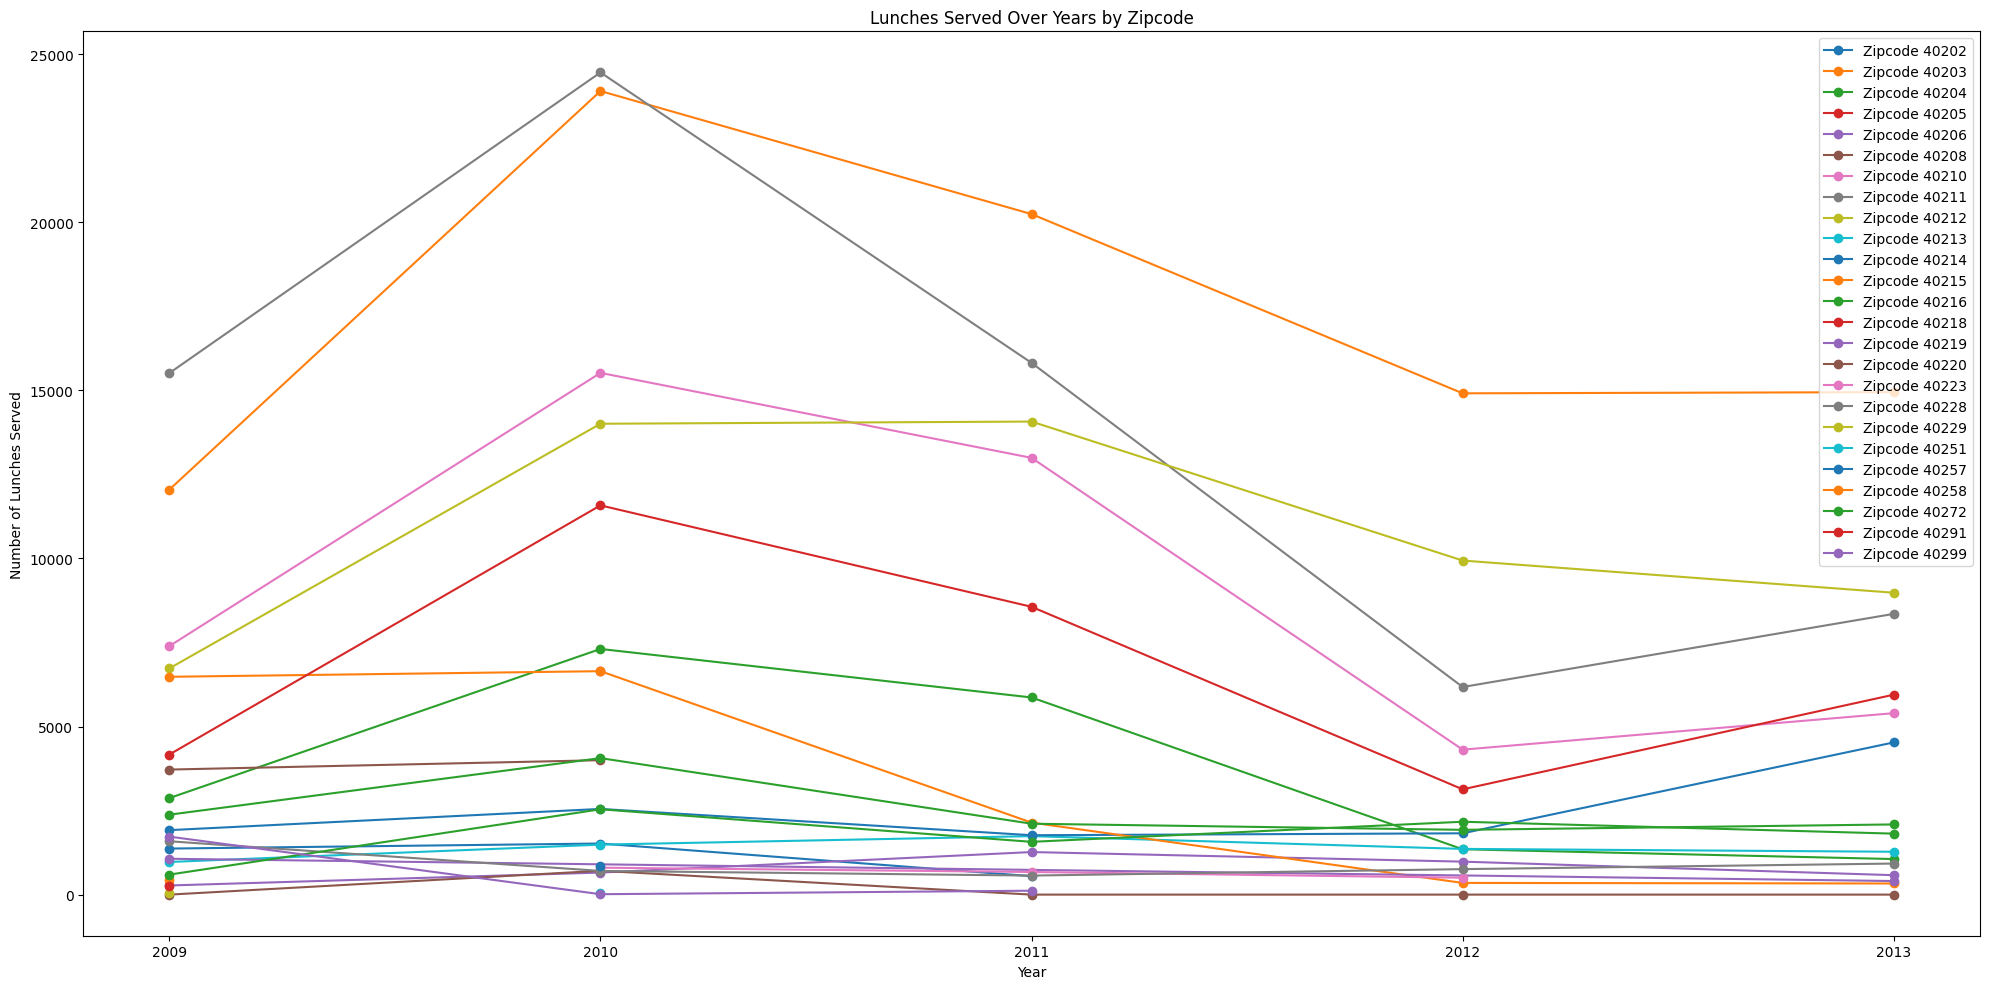

In [36]:
plt.figure(figsize=(20, 10))
for zipcode in meals_by_zip_year['SiteZipcode'].unique():
    subset = meals_by_zip_year[meals_by_zip_year['SiteZipcode'] == zipcode]
    plt.plot(subset['Year'], subset['LUNCH_SERV'], marker='o', label=f'Zipcode {zipcode}')

plt.title('Lunches Served Over Years by Zipcode')
plt.xticks(meals_by_zip_year['Year'].unique())
plt.xlabel('Year')
plt.ylabel('Number of Lunches Served')
plt.legend()
plt.tight_layout()
plt.show()

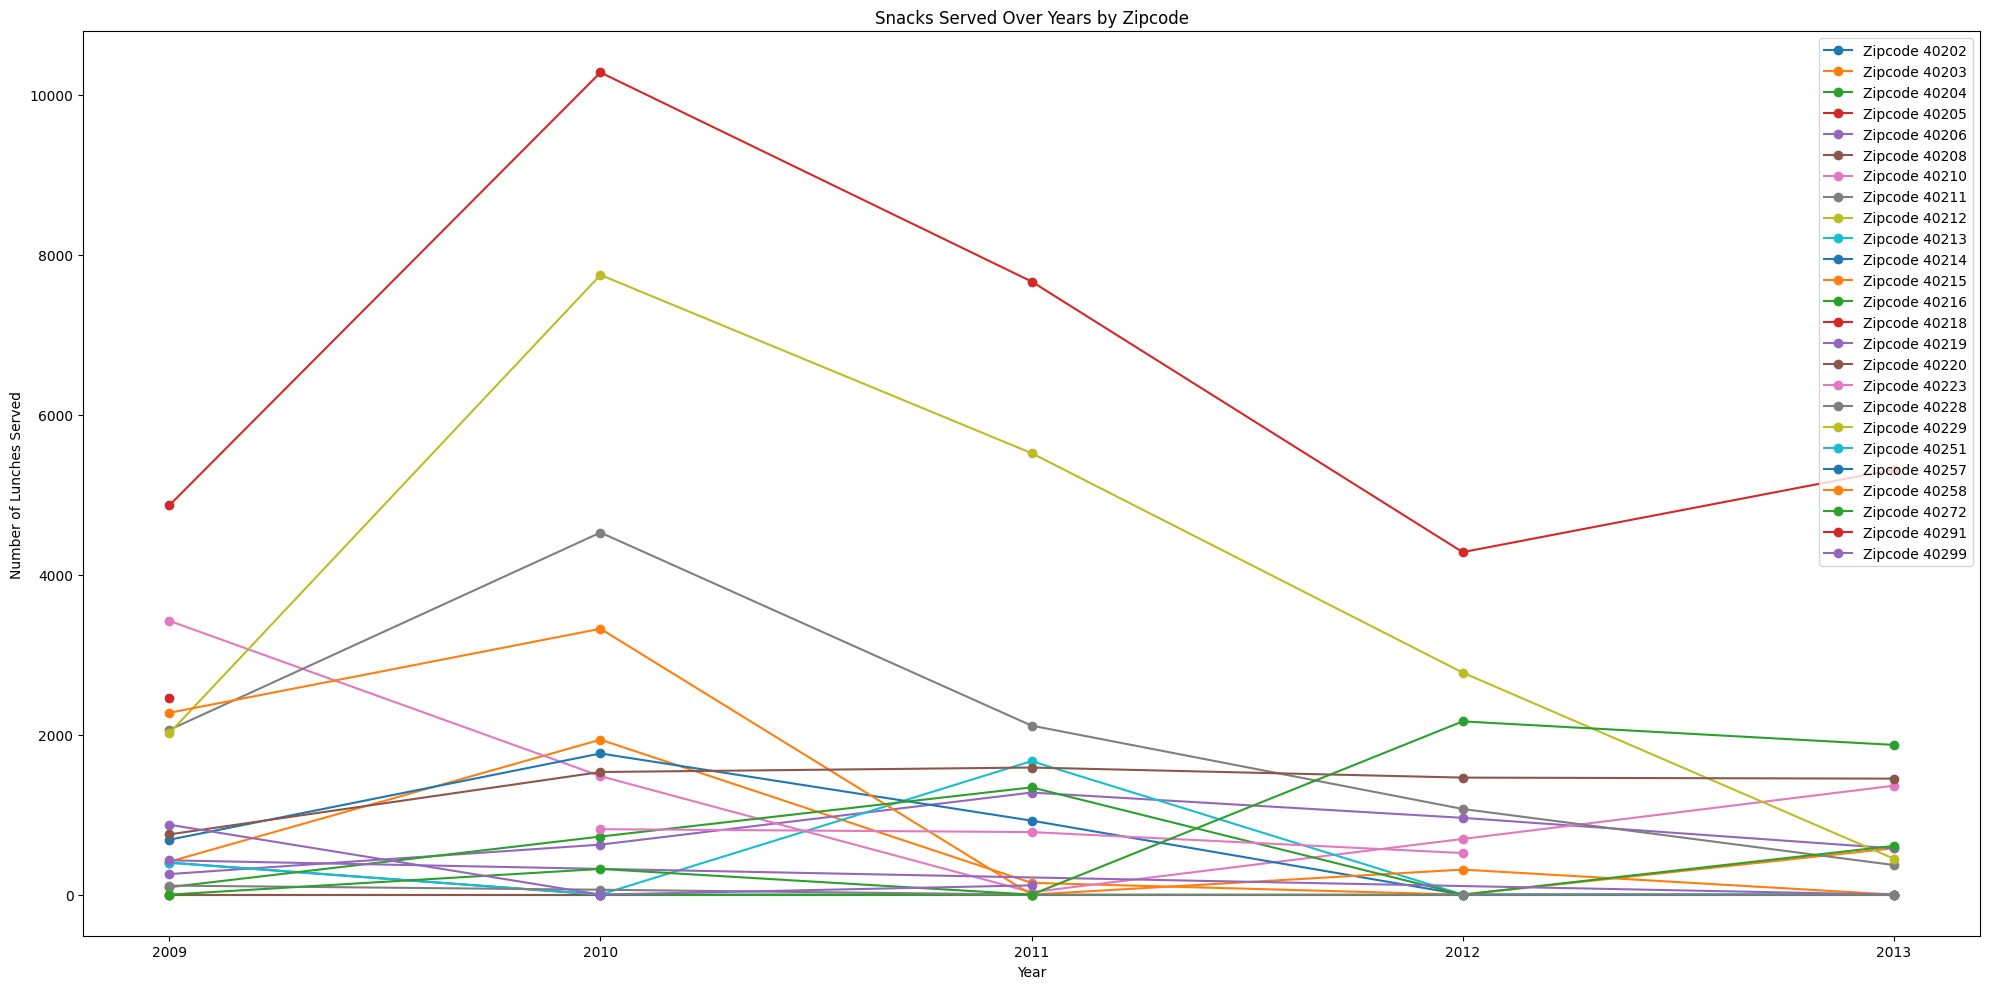

In [37]:
plt.figure(figsize=(20, 10))
for zipcode in meals_by_zip_year['SiteZipcode'].unique():
    subset = meals_by_zip_year[meals_by_zip_year['SiteZipcode'] == zipcode]
    plt.plot(subset['Year'], subset['SNACK_SERV'], marker='o', label=f'Zipcode {zipcode}')

plt.title('Snacks Served Over Years by Zipcode')
plt.xticks(meals_by_zip_year['Year'].unique())
plt.xlabel('Year')
plt.ylabel('Number of Lunches Served')
plt.legend()
plt.tight_layout()
plt.show()